<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 5 - REGRESSÃO LOGÍSTICA**

## QUESTÃO A - Modelagem da Retenção de clientes

CARREGAMENTO E ANÁLISE EXPLORATÓRIA DOS DADOS

In [38]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/Churn_Modelling.csv'

dados = pd.read_csv(path)

# teste de exibição do df

print(dados)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

TRATAMENTO E EXPLORAÇÃO DOS DADOS
1. REMOÇÃO DE DADOS INCONSISTENTES
2. EXPLORAÇÃO DOS DADOS E SELEÇÃO DE ATRIBUTOS

In [39]:
# DETERMINAÇÃO DAS COLUNAS DE INTERESSE PARA ANÁLISE PRÉVIA.

# CONTAGEM DE VALORES NULOS EM COLUNAS DE INTERESSE

print(dados['CustomerId'].isna().sum())
print(dados['CreditScore'].isna().sum())
print(dados['Age'].isna().sum())
print(dados['EstimatedSalary'].isna().sum())

# colunas não mostraram valores nulos, indicando boa consistência e completude dos dados.

0
0
0
0


ANÁLISE EXPLORATÓRIA DOS DADOS

In [40]:
# PROPORÇÃO DE CHURN

# Contar ocorrências de saída (churn) (ex: 'Exited == 1')

churn = dados['Exited'].sum()
total = dados['CustomerId'].value_counts().sum()
prop = churn / total

print("\nQuantidade de saídas:", churn)
print("\nQuantidade de clientes da base:", total)

print(f"\nProporção de churn: {prop*100:.2f} %")


Quantidade de saídas: 2037

Quantidade de clientes da base: 10000

Proporção de churn: 20.37 %


EXPLORANDO INDÍCIOS DE TENDÊNCIAS PARA CHURN: desses 20,37% que abandonam o serviço, existe algum atributo predominante, presente na maioria dos casos?

      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
2             3    15619304         Onio          502    France  Female   42   
5             6    15574012          Chu          645     Spain    Male   44   
7             8    15656148       Obinna          376   Germany  Female   29   
16           17    15737452        Romeo          653   Germany    Male   58   
...         ...         ...          ...          ...       ...     ...  ...   
9981       9982    15672754     Burbidge          498   Germany    Male   42   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   

      Tenure    Balance  NumOfProducts 

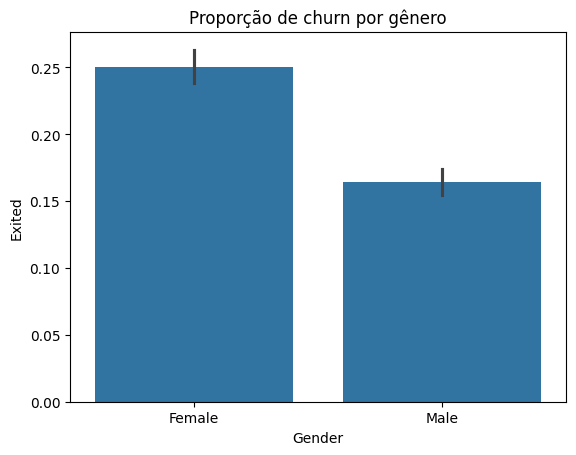



Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395



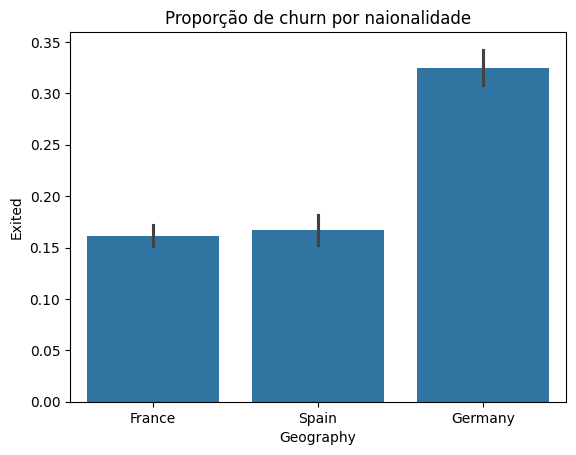

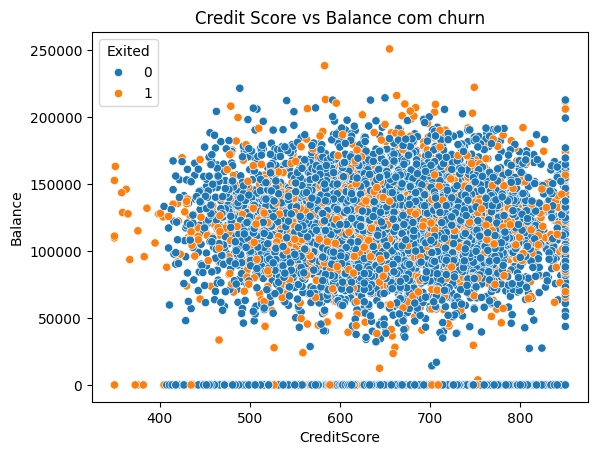

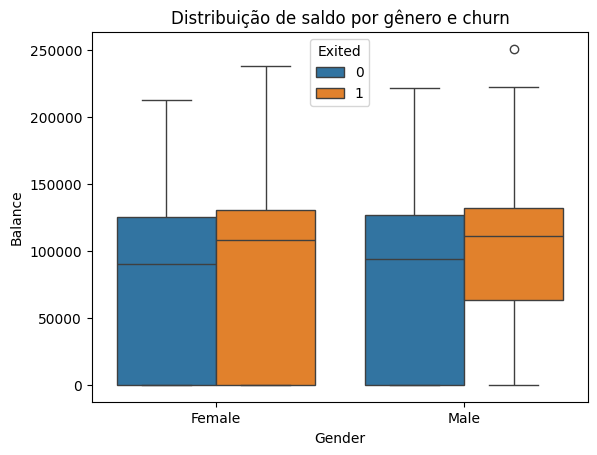


Geography  Gender
France     Female    0.203450
           Male      0.127134
Germany    Female    0.375524
           Male      0.278116
Spain      Female    0.212121
           Male      0.131124
Name: Exited, dtype: float64

Gender       Female      Male
Geography                    
France     0.203450  0.127134
Germany    0.375524  0.278116
Spain      0.212121  0.131124



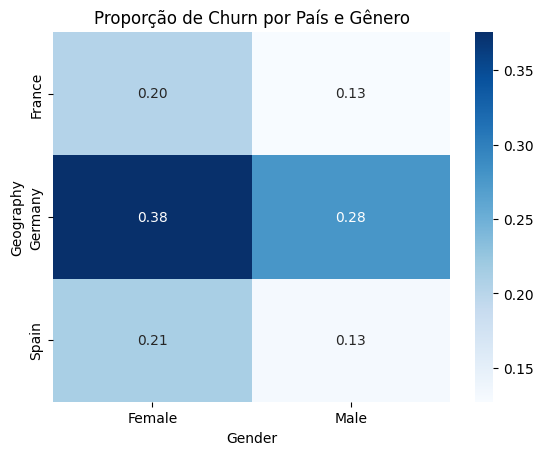

In [37]:
df_churn = dados[dados['Exited'] == 1]
print(df_churn)

df_naoChurn = dados[dados['Exited'] == 0]

# análise estatística de creditScore

print('\nAnálise estatística de CreditScore dos NÃO churn clients')

print(df_naoChurn['CreditScore'].mean())
print(df_naoChurn['CreditScore'].max())
print(df_naoChurn['CreditScore'].min())
print(df_naoChurn['CreditScore'].std())

print('\nAnálise estatística de CreditScore dos churn clients')

print(df_churn['CreditScore'].mean())
print(df_churn['CreditScore'].max())
print(df_churn['CreditScore'].min())
print(df_churn['CreditScore'].std())

# o valor mínimo de creditscore para os churn clients é consideravelmente menor que os não churn clients.

# análise estatística de EstimatedSalary

print('\nAnálise estatística de EstimatedSalary dos NÃO churn clients')

print(df_naoChurn['EstimatedSalary'].mean())
print(df_naoChurn['EstimatedSalary'].max())
print(df_naoChurn['EstimatedSalary'].min())
print(df_naoChurn['EstimatedSalary'].std())

print('\nAnálise estatística de EstimatedSalary dos churn clients')

print(df_churn['EstimatedSalary'].mean())
print(df_churn['EstimatedSalary'].max())
print(df_churn['EstimatedSalary'].min())
print(df_churn['EstimatedSalary'].std())

# ANALISANDO FREQUÊNCIA E PROPORÇÃO PARA ALGUMAS VARIÁVEIS CATEGÓRICAS

import seaborn as sns
import matplotlib.pyplot as plt


print()
# Tabela cruzada: contagem de churn por gênero
print(pd.crosstab(dados['Gender'], dados['Exited']))
print()
# Proporção de churn por gênero
print(pd.crosstab(dados['Gender'], dados['Exited'], normalize='index') * 100)
print()
#  churn por gênero
sns.barplot(x='Gender', y='Exited', data=dados)
plt.title('Proporção de churn por gênero')
plt.show()
print()
# mulheres dão mais churn estatisticamente quando comparadas aos homens.
print()
print(pd.crosstab(dados['Geography'], dados['Exited'], normalize='index') * 100)
print()

# Exemplo: proporção de churn por gênero
sns.barplot(x='Geography', y='Exited', data=dados)
plt.title('Proporção de churn por naionalidade')
plt.show()
print()

# os alemães estatisticamente são mais propensos a dar churn do que outras nacionalidades



# análises multivariadas, com duas variáveis

# relação entre CreditScore e Balance
sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=dados)
plt.title('Credit Score vs Balance com churn')
plt.show()
print()

# a análise multivariada de creditScore e Balance não mostrou concentração de churns em nenhuma região do gráfico, ou seja, não evidenciou nenhum padrão para a variável de interesse churn.

# distribuição de saldo por gênero e churn
sns.boxplot(x='Gender', y='Balance', hue='Exited', data=dados)
plt.title('Distribuição de saldo por gênero e churn')
plt.show()
print()

# não foi possível extrair relações significativas por meio da exploração de gender e balance.

# finalmente, será analisada a possível relação entre gender e geography, duas variáveis categóricas.

# Proporção média de churn (Exited) por país e gênero
tabela = dados.groupby(['Geography', 'Gender'])['Exited'].mean()
print(tabela)
print()

# Tabela cruzada com proporção de churn
tabela_cruzada = pd.crosstab(index=dados['Geography'],
                              columns=dados['Gender'],
                              values=dados['Exited'],
                              aggfunc='mean')  # média representa a proporção de churn

print(tabela_cruzada)
print()

import seaborn as sns
import matplotlib.pyplot as plt

# Tabela para gráfico
tabela_heatmap = pd.crosstab(dados['Geography'], dados['Gender'], values=dados['Exited'], aggfunc='mean')

# Plotar o heatmap
sns.heatmap(tabela_heatmap, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporção de Churn por País e Gênero')
plt.show()



A PARTIR DA ANÁLISE EXPLORATÓRIA FOI POSSÍVEL PERCEBER QUE MULHERES TENDEM A DAR CHURN MAIS QUE HOMENS, QUE ALEMÃES TENDEM A DAR CHURN MAIS QUE AS OUTRAS NACIONALIDADES ANALISADAS, QUE O MÍNIMO VALOR DE SALÁRIO ESTIMADO DOS CLIENTES QUE DÃO CHURN É MUITO MENOR QUE O DOS CLIENTES QUE NÃO DÃO CHURN, E QUE O CREDITSCORE MÍNIMO DOS CLIENTES QUE DÃO CHURN TAMBÉM É MENOR.